# Evaluating Supervised Models

- We will walk through the process that ML practitioners / researchers use to diagnose their models
- You will reason through graduate-level ML questions
- Skills will apply to ANY supervised model you use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Description of the dataset available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.names)

In [2]:
!head -5 park.csv

"MDVP.Fo.Hz.","MDVP.Fhi.Hz.","MDVP.Flo.Hz.","MDVP.Jitter...","MDVP.Jitter.Abs.","MDVP.RAP","MDVP.PPQ","Jitter.DDP","MDVP.Shimmer","MDVP.Shimmer.dB.","Shimmer.APQ3","Shimmer.APQ5","MDVP.APQ","Shimmer.DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","parkinsons"
119.992,157.302,74.997,0.00784,7e-05,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
122.4,148.65,113.819,0.00968,8e-05,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674,1
116.682,131.111,111.555,0.0105,9e-05,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.0359,0.0827,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
116.676,137.871,111.366,0.00997,9e-05,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1


In [3]:
# import park data
park = pd.read_csv('park.csv')

In [4]:
park.head()

,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,MDVP.Shimmer.dB.,...,Shimmer.DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,parkinsons
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [5]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP.Fo.Hz.         195 non-null float64
MDVP.Fhi.Hz.        195 non-null float64
MDVP.Flo.Hz.        195 non-null float64
MDVP.Jitter...      195 non-null float64
MDVP.Jitter.Abs.    195 non-null float64
MDVP.RAP            195 non-null float64
MDVP.PPQ            195 non-null float64
Jitter.DDP          195 non-null float64
MDVP.Shimmer        195 non-null float64
MDVP.Shimmer.dB.    195 non-null float64
Shimmer.APQ3        195 non-null float64
Shimmer.APQ5        195 non-null float64
MDVP.APQ            195 non-null float64
Shimmer.DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null f

In [6]:
park_labels = park['parkinsons']
park_X = park.drop('parkinsons', axis=1)

In [7]:
# be careful when splitting time series!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(park_X, park_labels, 
                                                    test_size=0.2, random_state=7)

In [8]:
# 20 cross validation iterations with 30% test / 70% train
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)

We need to be sure our features are equally weighted by being on the same scale. This is especially true for any algorithms that deal with distance, such as kNN! 

Imagine we have a feature measured in feet. If we convert that feature to inches, its importance in kNN would increase by a factor of 12, even though the overall meaning hasn't changed!

In [9]:
# standardization: bring all of our features onto the same scale
# this makes it easier for ML algorithms to learn
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

In [10]:
# all features now on the same scale:
# mean of approx 0 and std of approx 1
pd.DataFrame(X_train_std, columns=X_train.columns).describe()

,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,MDVP.Shimmer.dB.,...,MDVP.APQ,Shimmer.DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,...,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,7.735977e-16,-2.206212e-17,-2.211550e-16,2.490885e-16,-2.562053e-17,-5.195274e-17,1.530115e-16,-1.700919e-16,1.359312e-16,-7.757328e-17,...,2.647455e-16,3.843080e-17,2.170628e-17,5.351844e-16,1.124457e-16,-1.347925e-15,1.868164e-16,1.487414e-16,-8.732331e-16,-1.720490e-16
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,...,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.572924e+00,-1.104233e+00,-1.199705e+00,-9.298629e-01,-1.068139e+00,-8.756653e-01,-9.048457e-01,-8.757960e-01,-1.036476e+00,-9.804519e-01,...,-9.525720e-01,-1.055359e+00,-5.828938e-01,-3.084070e+00,-2.323901e+00,-2.554121e+00,-2.006947e+00,-2.463417e+00,-2.393517e+00,-1.729221e+00
25%,-8.815449e-01,-7.009993e-01,-7.472381e-01,-5.712102e-01,-6.820096e-01,-5.436567e-01,-5.689804e-01,-5.437743e-01,-6.864633e-01,-6.835779e-01,...,-6.351772e-01,-7.164905e-01,-4.505359e-01,-6.218200e-01,-7.924725e-01,-8.392798e-01,-6.865966e-01,-6.003890e-01,-7.541272e-01,-7.590438e-01
50%,-1.316592e-01,-2.026310e-01,-3.067633e-01,-2.464127e-01,-3.849870e-01,-2.601924e-01,-2.645736e-01,-2.602989e-01,-3.779570e-01,-3.558599e-01,...,-3.514805e-01,-3.089146e-01,-3.253010e-01,4.335845e-02,-1.311925e-02,7.384321e-02,-3.885132e-02,-1.461083e-01,-6.169908e-02,-1.678489e-01
75%,7.377718e-01,3.746090e-01,5.539176e-01,2.196242e-01,2.090582e-01,1.758399e-01,2.174809e-01,1.748836e-01,4.400703e-01,3.741159e-01,...,3.242075e-01,3.428899e-01,3.343815e-02,7.098920e-01,8.627279e-01,7.929689e-01,5.312981e-01,5.643976e-01,5.142849e-01,5.007578e-01
max,2.550889e+00,5.019975e+00,2.664766e+00,5.731132e+00,6.446533e+00,6.322768e+00,6.001210e+00,6.324076e+00,4.792550e+00,5.275749e+00,...,6.569857e+00,4.127392e+00,7.554657e+00,2.473143e+00,1.769583e+00,1.956227e+00,2.921693e+00,2.690860e+00,3.416141e+00,3.503581e+00


In [11]:
# constructing classifier
# initialize our kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

## We have lots of parameters for kNN. How do we choose the best ones?

- What value for k?
- Which weighting function do we use?
- What value for p?

What are our options for figuring out which to use?

We can use gridsearch to let sklearn try all the possibilities for us and return the best performing combination!

In [12]:
# gridsearch for hyperparameters
from sklearn.model_selection import GridSearchCV
# the parameters we want to search in a dictionary
# use the parameter name from sklearn as the key
# and the possible values you want to test as the values
parameters = {'n_neighbors': range(1,30), 'weights': ['uniform', 'distance'],
             'p': range(1,4)}
clf = GridSearchCV(knn, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=0, test_size=0.3, train_size=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [13]:
# get the best performing combo
clf.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [14]:
# get a list of all the combo scores
clf.cv_results_

{'mean_fit_time': array([ 0.00124501,  0.00099236,  0.00099216,  0.00098625,  0.00103244,
         0.0010182 ,  0.00100167,  0.00101837,  0.00105962,  0.00102478,
         0.00128338,  0.00113536,  0.00127376,  0.0012044 ,  0.00107036,
         0.00103163,  0.00136203,  0.00118169,  0.00111979,  0.00122269,
         0.00112376,  0.00137044,  0.00110524,  0.00141243,  0.001188  ,
         0.00136448,  0.00137361,  0.0013706 ,  0.0014008 ,  0.00127476,
         0.00128669,  0.00150936,  0.00104816,  0.0010518 ,  0.00101813,
         0.00106655,  0.00137321,  0.00147215,  0.00155041,  0.00137228,
         0.00110265,  0.00113631,  0.00126141,  0.00124079,  0.00127671,
         0.001219  ,  0.00164315,  0.00133998,  0.00132427,  0.00127219,
         0.00111548,  0.00107654,  0.00112985,  0.00119807,  0.00141944,
         0.00142658,  0.00169551,  0.00140742,  0.0010271 ,  0.00127825,
         0.00111784,  0.00107055,  0.00112519,  0.00105584,  0.00107037,
         0.00102763,  0.00112644, 

In [15]:
best_knn = clf.best_estimator_

## The learning curve

- powerful tool that let's us diagnose our models
- helps us determine if a particular model will be useful
- tells us if more data or more features will help our performance

Note: install sk_modelcurves with `pip install sk_modelcurves` on your terminal

In [16]:
from sk_modelcurves.learning_curve import draw_learning_curve

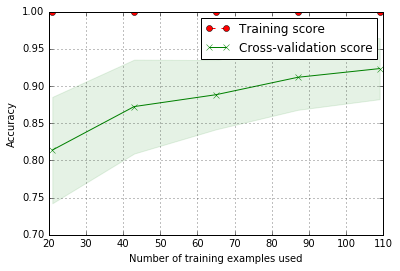

In [17]:
# high variance
draw_learning_curve(best_knn, X_train_std, y_train, cv=cv,
                   scoring='accuracy');

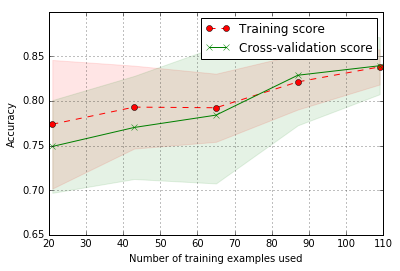

In [18]:
# high bias
knn2 = KNeighborsClassifier(n_neighbors=19)
knn2.fit(X_train_std, y_train)
draw_learning_curve(knn2, X_train_std, y_train, cv=cv,
                   scoring='accuracy');

### We measure the ACTUAL performance on the test set!

- Remember, the test set represents our "unseen" data!
- This is our best estimate on how well the model would perform on new data

In [19]:
# okay cool, so how good is our model?
best_knn.score(X_test_std, y_test)

0.97435897435897434

In [20]:
# our higher bias model
knn2.score(X_test_std, y_test)

0.87179487179487181

# Quiz

- What can we do to improve a model that has high variance?

- What can we do to improve a model that has high bias?

- A company wants you to buy their new data vision product. They claim they are far better than the competition, with their model achieving an accuracy of 95% of the training set! What do you think of this proposition?

- Is the Parkinson's dataset well-suited for kNN?

- Your boss/client wants you to use k=5 for your kNN model. Is this a good idea? Show your work: create a learning curve and be sure to mention performance in terms of accuracy as well as runtime!